Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2024./2025.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **3. studenog 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [20]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [21]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [22]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [23]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Accuracy: 1.0


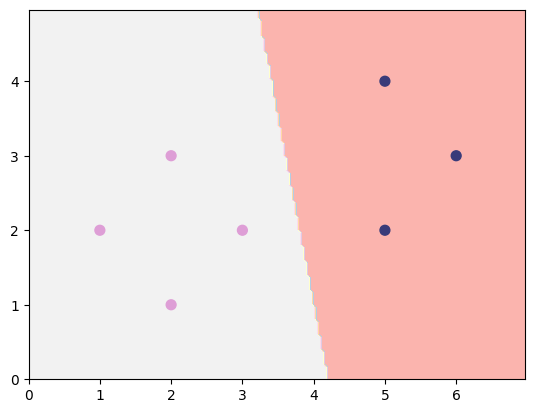

In [24]:
model = RidgeClassifier(alpha=0)
model.fit(seven_X, seven_y)
predictions = model.predict(seven_X)

accuracy = accuracy_score(seven_y, predictions)
print(f"Accuracy: {accuracy}")

plot_2d_clf_problem(seven_X, seven_y, model.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Accuracy: 1.0


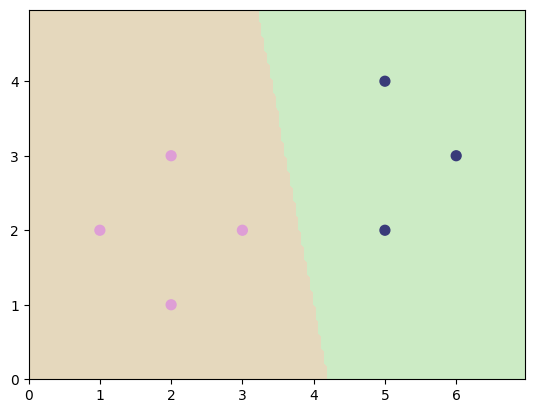

In [25]:
model = LinearRegression()
model.fit(seven_X, seven_y)
predictions = model.predict(seven_X) >= 0.5

accuracy = accuracy_score(seven_y, predictions)
print(f"Accuracy: {accuracy}")

plot_2d_clf_problem(seven_X, seven_y, lambda x: model.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [26]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Accuracy: 0.875


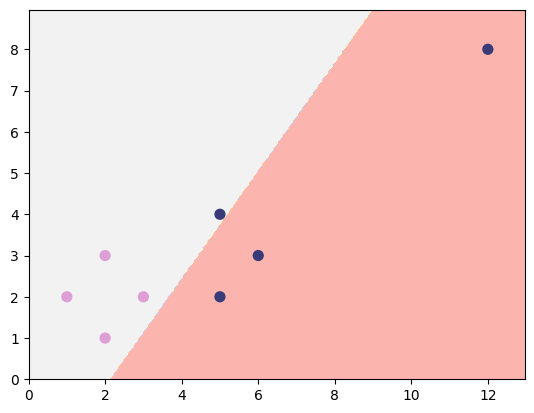

In [27]:
model = RidgeClassifier(alpha=0)
model.fit(outlier_X, outlier_y)
predictions = model.predict(outlier_X)

accuracy = accuracy_score(outlier_y, predictions)
print(f"Accuracy: {accuracy}")

plot_2d_clf_problem(outlier_X, outlier_y, model.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [28]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Accuracy: 0.875


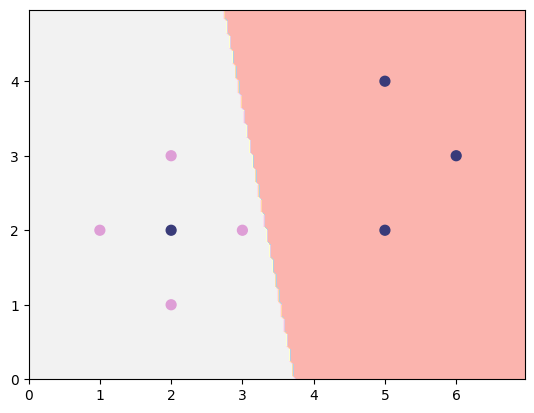

In [29]:
model = RidgeClassifier(alpha=0)
model.fit(unsep_X, unsep_y)
predictions = model.predict(unsep_X)

accuracy = accuracy_score(unsep_y, predictions)
print(f"Accuracy: {accuracy}")

plot_2d_clf_problem(unsep_X, unsep_y, model.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

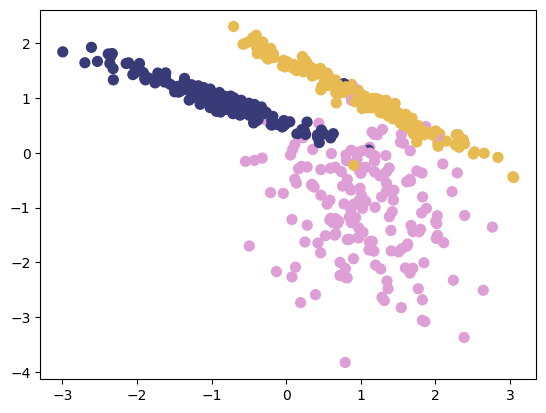

In [50]:
from sklearn.datasets import make_classification

seven_X, seven_y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=3)

plot_2d_clf_problem(seven_X, seven_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

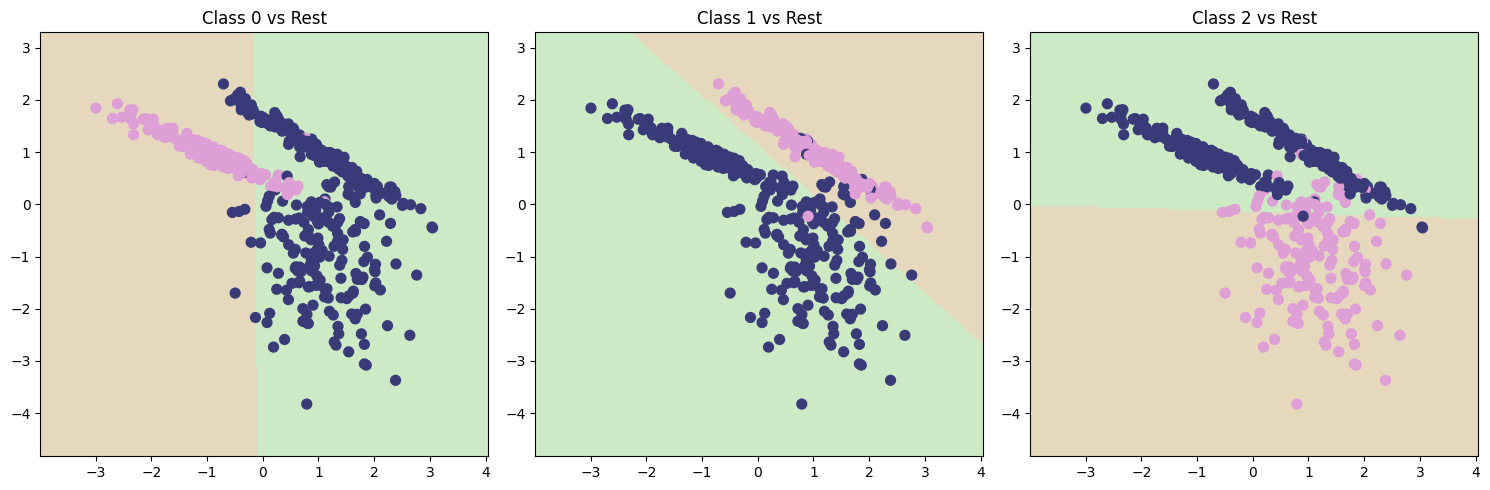

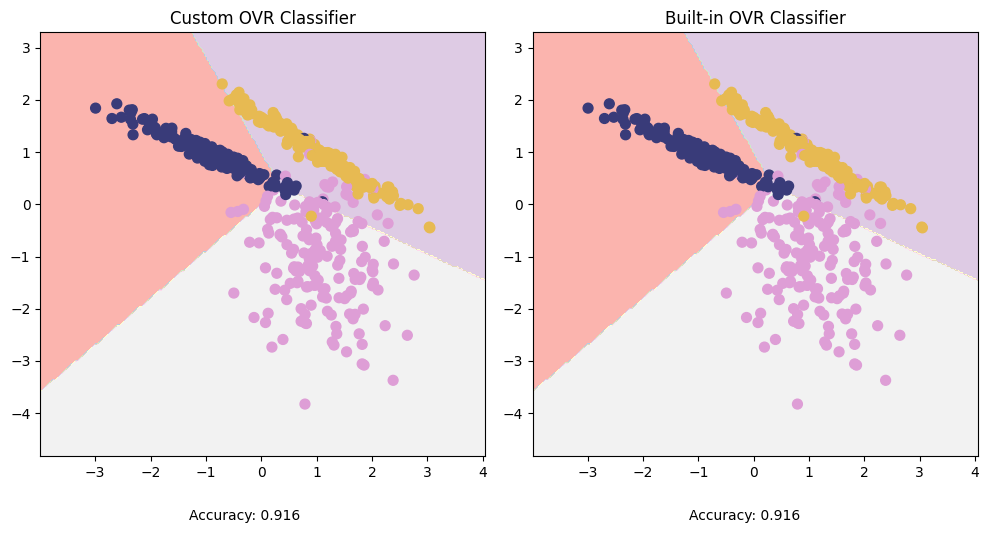

In [51]:
def train_ovr_classifier(X, y, class_idx):
    return LinearRegression().fit(X, y == class_idx)

def predict(X, h_list):
    scores = np.column_stack([h.predict(X) for h in h_list])
    return np.argmax(scores, axis=1)

def plot_binary_classifier(X, y, h, class_idx, num_classes):
    position = 100 + num_classes * 10 + class_idx + 1
    plt.subplot(position)
    plot_2d_clf_problem(X, y == class_idx, lambda x: h.predict(x) > 0.5)
    plt.title(f'Class {class_idx} vs Rest')
    plt.tight_layout()

def plot_combined_classifiers(X, y, h_list):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(121)
    plot_2d_clf_problem(X, y, lambda x: predict(x, h_list))
    plt.title('Custom OVR Classifier')
    plt.figtext(0.25, -0.05, f'Accuracy: {accuracy_score(y, predict(X, h_list))}', ha='center', fontsize=10)
    
    clf = RidgeClassifier().fit(X, y)
    plt.subplot(122)
    plot_2d_clf_problem(X, y, clf.predict)
    plt.title('Built-in OVR Classifier')
    plt.figtext(0.75, -0.05, f'Accuracy: {accuracy_score(y, clf.predict(X))}', ha='center', fontsize=10)
    
    plt.tight_layout()

num_classes = 3
h_list = []
plt.figure(figsize=(15, 5))
for i in range(num_classes):
    h = train_ovr_classifier(seven_X, seven_y, i)
    plot_binary_classifier(seven_X, seven_y, h, i, num_classes)
    h_list.append(h)
plt.tight_layout()

plot_combined_classifiers(seven_X, seven_y, h_list)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

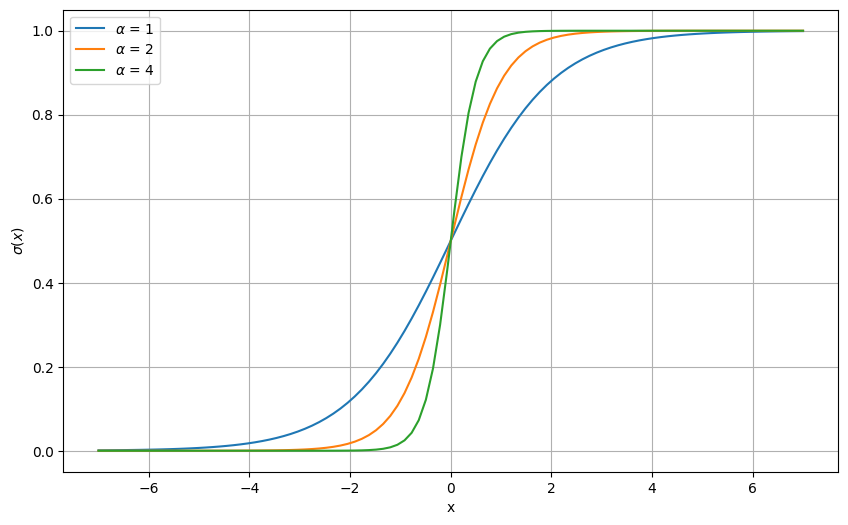

In [32]:
def sigmoid(x, alpha=1):
    return 1 / (1 + np.exp(-alpha * x))

x = np.linspace(-7, 7, 100)
plt.figure(figsize=(10, 6))
for alpha in [1, 2, 4]:
    seven_y = sigmoid(x, alpha)
    plt.plot(x, seven_y, label=fr'$\alpha$ = {alpha}')

plt.grid(True)
plt.xlabel('x')
plt.ylabel(r"$\sigma(x)$")
plt.legend()
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [33]:
def lr_h(x, w, add_bias=True):
    if add_bias:
        x = np.insert(x, 0, 1)
    return sigmoid(np.dot(x, w))

def cross_entropy_error(X, y, w, add_bias=True):
    if add_bias:
        X = np.insert(X, 0, 1, axis=1)
    ce = 0
    for i in range(len(X)):
        h = lr_h(X[i], w, add_bias=False)
        ce += -y[i] * np.log(h + 1e-10) - (1 - y[i]) * np.log(1 - h + 1e-10)
    return ce / len(X)

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    X = np.insert(X, 0, 1, axis=1) # add bias term
    y = np.array([1 if yi == 1 else 0 for yi in y]) # make sure that y is binary (0 or 1)
    n, m = X.shape
    w = np.zeros(m)
    if trace:
        w_history = [w.copy()] # .copy() makes na new object     
    prev_error = float('inf')
    for i in range(max_iter):
        delta_w = np.zeros(m)
        for j in range(n):
            h = lr_h(X[j], w, add_bias=False)
            delta_w += (h - y[j]) * X[j]

        w[0] -= eta * delta_w[0]
        w[1:] = w[1:] * (1 - eta * alpha) - eta * delta_w[1:]
        
        error = cross_entropy_error(X, y, w, add_bias=False)
        if abs(prev_error - error) < epsilon:
            break
        prev_error = error
        if trace:
            w_history.append(w.copy())
    
    print(f'Converged after {i+1} iterations')
    if trace:
        return w, np.array(w_history)
    return w 

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [34]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Converged after 947 iterations
Weights:  [ 4.45449454 -1.71089242  0.68413507]
Error: 0.13521872708653207


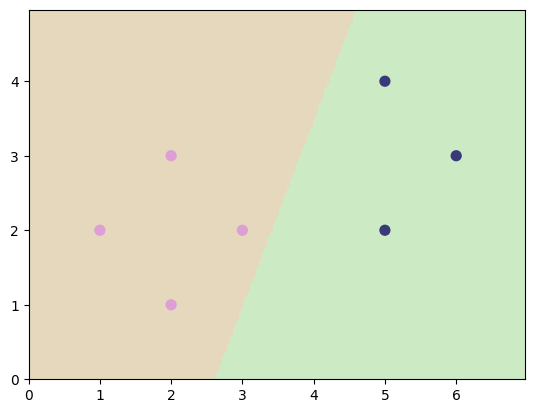

In [35]:
w = lr_train(seven_X, y=seven_y)
print("Weights: ", w)
print(f"Error: {cross_entropy_error(seven_X, seven_y, w)}")
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, w) > 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [36]:
from sklearn.metrics import zero_one_loss

Converged after 947 iterations
Converged after 1142 iterations
Converged after 947 iterations
Converged after 511 iterations
Converged after 378 iterations


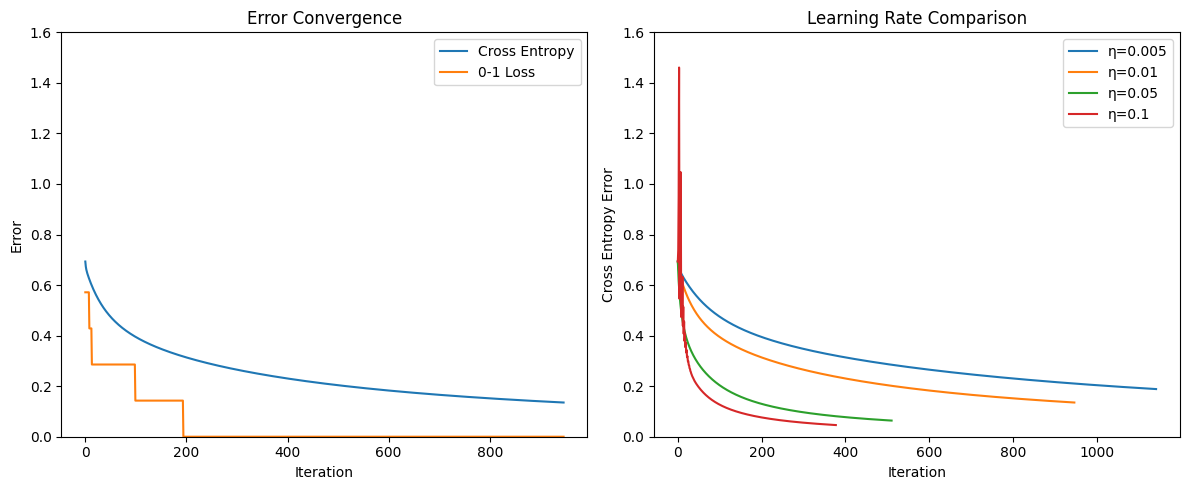

In [37]:
def plot_convergence_comparison(X, y, w_history):
    cross_entropy_errors = []
    classification_errors = []
    
    for w in w_history:
        ce = cross_entropy_error(X, y, w)
        cross_entropy_errors.append(ce)
        
        y_pred = np.array([1 if lr_h(x, w) > 0.5 else 0 for x in X])
        cl_error = zero_one_loss(y, y_pred)
        classification_errors.append(cl_error)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    plt.plot(cross_entropy_errors, label='Cross Entropy')
    plt.plot(classification_errors, label='0-1 Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.ylim(0, 1.6)
    plt.title('Error Convergence')
    plt.legend()
    
    plt.subplot(122)
    etas = [0.005, 0.01, 0.05, 0.1]
    for eta in etas:
        _, w_history = lr_train(X, y, eta=eta, trace=True)
        errors = []
        for w in w_history:
            err = cross_entropy_error(X, y, w)
            errors.append(err)
        plt.plot(errors, label=f'η={eta}')
    
    plt.xlabel('Iteration')
    plt.ylabel('Cross Entropy Error')
    plt.ylim(0, 1.6)
    plt.title('Learning Rate Comparison')
    plt.legend()
    
    plt.tight_layout()
    
_, w_history = lr_train(seven_X, seven_y, trace=True)
cross_entropy_errors = []
classification_errors = []

for w in w_history:
    ce = cross_entropy_error(seven_X, seven_y, w)
    cross_entropy_errors.append(ce)
    
    y_pred = np.array([1 if lr_h(x, w) > 0.5 else 0 for x in seven_X])
    cl_error = zero_one_loss(seven_y, y_pred)
    classification_errors.append(cl_error)

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(cross_entropy_errors, label='Cross Entropy')
plt.plot(classification_errors, label='0-1 Loss')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.ylim(0, 1.6)
plt.title('Error Convergence')
plt.legend()

plt.subplot(122)
etas = [0.005, 0.01, 0.05, 0.1]
for eta in etas:
    _, w_history = lr_train(seven_X, seven_y, eta=eta, trace=True)
    errors = []
    for w in w_history:
        err = cross_entropy_error(seven_X, seven_y, w)
        errors.append(err)
    plt.plot(errors, label=f'η={eta}')

plt.xlabel('Iteration')
plt.ylabel('Cross Entropy Error')
plt.ylim(0, 1.6)
plt.title('Learning Rate Comparison')
plt.legend()

plt.tight_layout()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

Converged after 947 iterations
Custom cross entropy error: 0.13521872708653207
Sklearn cross entropy error: 0.1388356792477958
Custom weights: [ 4.45449454 -1.71089242  0.68413507]
Sklearn weights: [ 5.33129609 -1.18244419 -0.30251926]


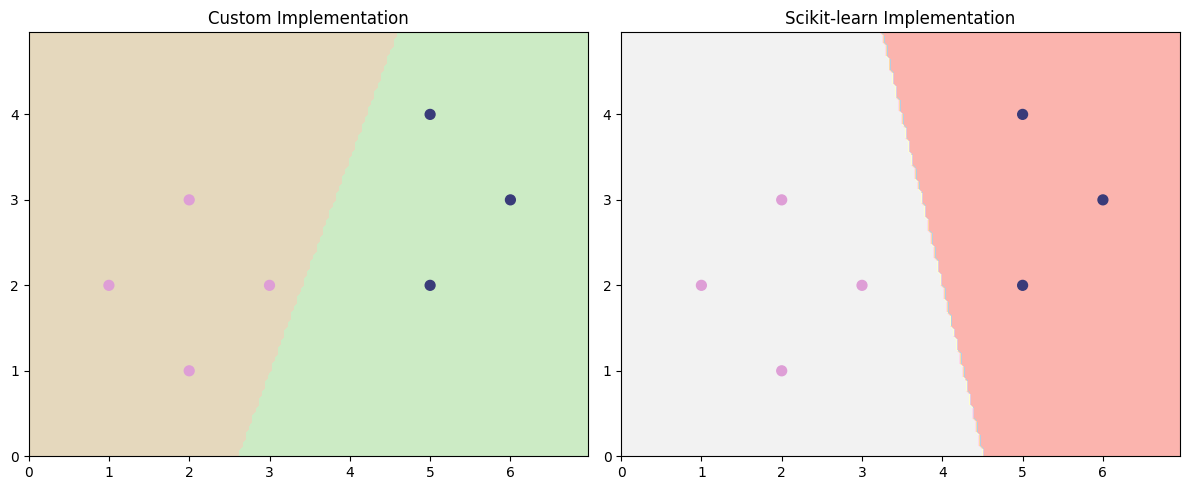

In [38]:
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(12, 5))

w_custom = lr_train(seven_X, seven_y, max_iter=2000, eta=0.01)
plt.subplot(121)
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, w_custom) > 0.5)
plt.title('Custom Implementation')
print(f"Custom cross entropy error: {cross_entropy_error(seven_X, seven_y, w_custom)}")

clf = LogisticRegression(max_iter=2000)
clf.fit(seven_X, seven_y)
plt.subplot(122)
plot_2d_clf_problem(seven_X, seven_y, clf.predict)
plt.title('Scikit-learn Implementation')
print(f"Sklearn cross entropy error: {cross_entropy_error(seven_X, seven_y, np.concatenate([clf.intercept_, clf.coef_[0]]))}")

print(f"Custom weights: {w_custom}")
print(f"Sklearn weights: {np.concatenate([clf.intercept_, clf.coef_[0]])}")

plt.tight_layout()

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [39]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Converged after 843 iterations


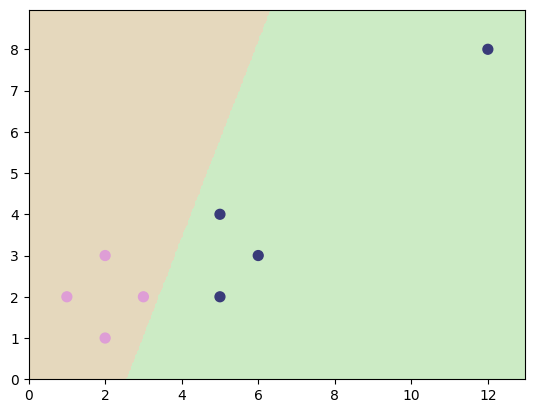

In [40]:
w = lr_train(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: lr_h(x, w) > 0.5)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

Converged after 947 iterations


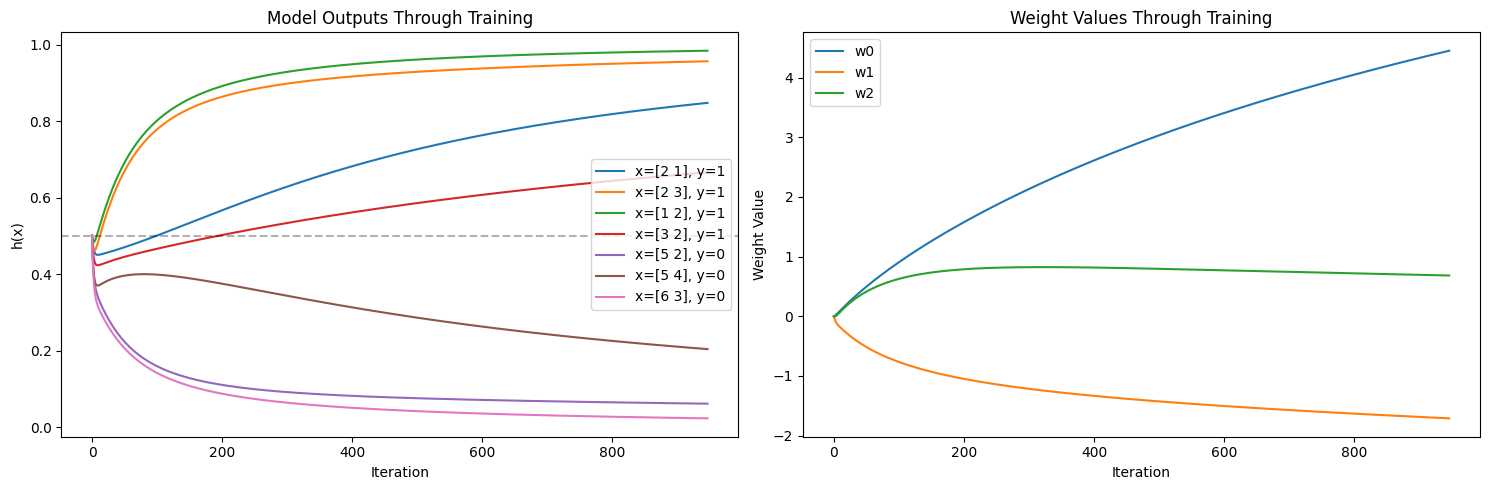

Converged after 947 iterations


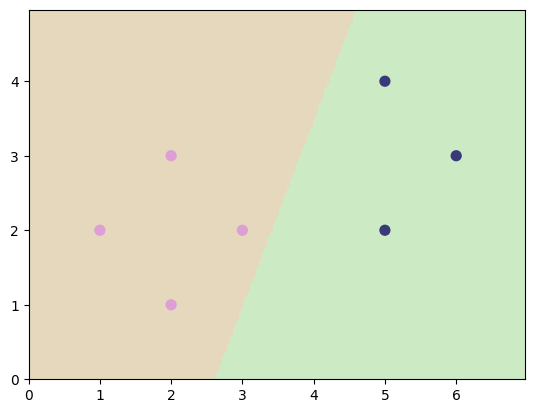

In [41]:
def plot_training_visualization(X, y):
    _, w_history = lr_train(X, y, trace=True)
    w_history = np.array(w_history)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    outputs = np.array([[lr_h(X[i], w) for w in w_history] for i in range(len(X))])
    for i in range(len(X)):
        plt.plot(outputs[i], label=f'x={X[i]}, y={y[i]}')
    plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.3)
    plt.xlabel('Iteration')
    plt.ylabel('h(x)')
    plt.title('Model Outputs Through Training')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(w_history[:, 0], label='w0')
    plt.plot(w_history[:, 1], label='w1')
    plt.plot(w_history[:, 2], label='w2')
    plt.xlabel('Iteration')
    plt.ylabel('Weight Value')
    plt.title('Weight Values Through Training')
    plt.legend()
    
    plt.tight_layout()
    return w

plot_training_visualization(seven_X, seven_y)
plt.show()
w = lr_train(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, w) > 0.5)
plt.show()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [42]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Converged after 454 iterations


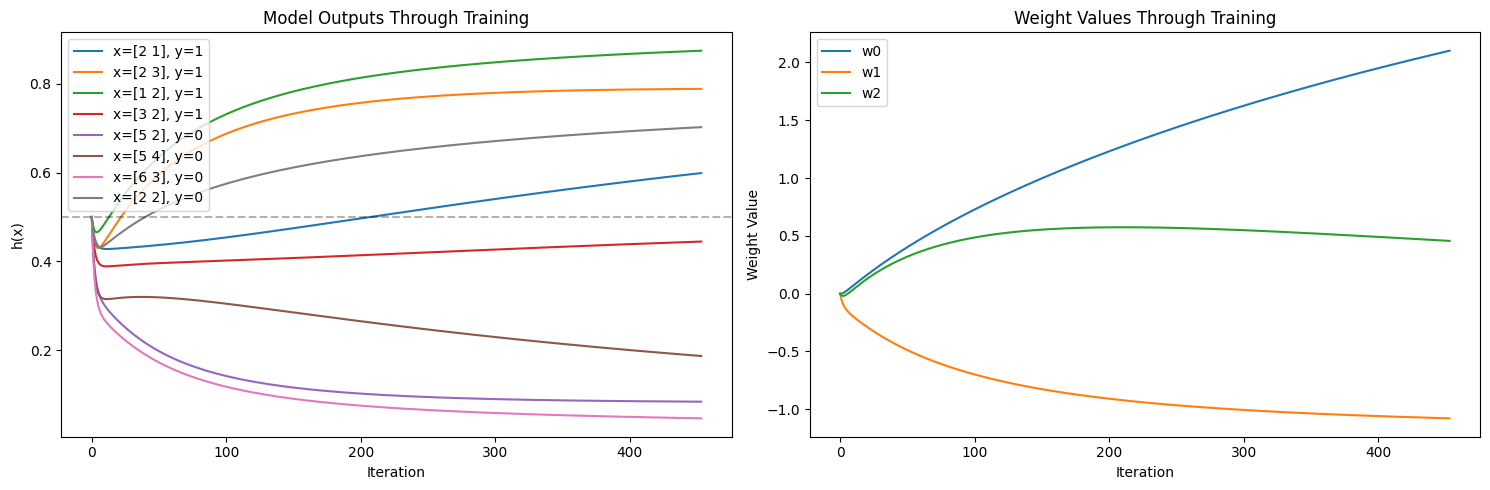

Converged after 454 iterations


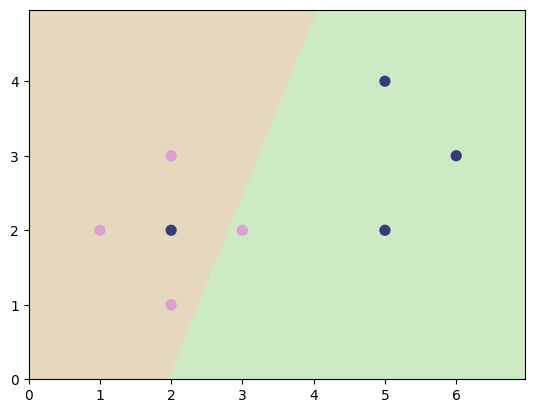

In [43]:
plot_training_visualization(unsep_X, unsep_y)
plt.show()
w = lr_train(unsep_X, unsep_y)
plot_2d_clf_problem(unsep_X, unsep_y, lambda x: lr_h(x, w) > 0.5)
plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [44]:
from numpy.linalg import norm

α=0:
Converged after 947 iterations
α=1:
Converged after 804 iterations
α=10:
Converged after 405 iterations
α=100:
Converged after 4 iterations


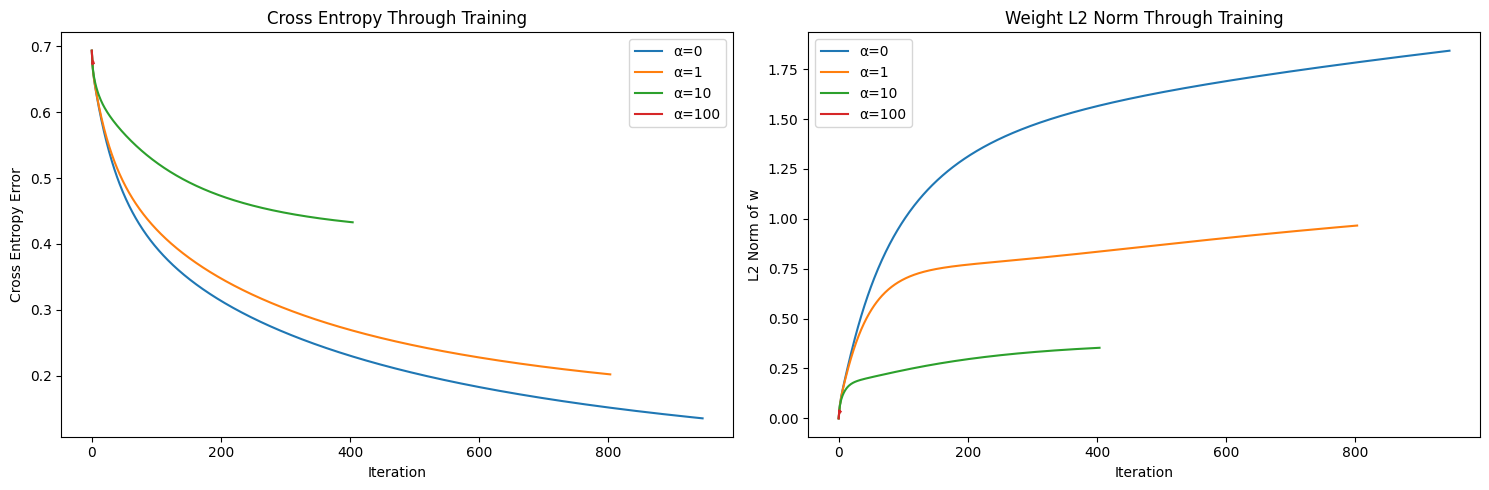

In [45]:
alphas=[0, 1, 10, 100]
plt.figure(figsize=(15, 5))

for alpha in alphas:
    print(f'α={alpha}:')
    w, w_history = lr_train(seven_X, seven_y, alpha=alpha, trace=True)

    cross_entropy = [cross_entropy_error(seven_X, seven_y, w_i) for w_i in w_history]
    l2_norms = [np.linalg.norm(w_i[1:]) for w_i in w_history] # exclude bias
    
    plt.subplot(121)
    plt.plot(cross_entropy, label=f'α={alpha}')
    plt.xlabel('Iteration')
    plt.ylabel('Cross Entropy Error')
    plt.title('Cross Entropy Through Training')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(l2_norms, label=f'α={alpha}')
    plt.xlabel('Iteration')
    plt.ylabel('L2 Norm of w')
    plt.title('Weight L2 Norm Through Training')
    plt.legend()

plt.tight_layout()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [46]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

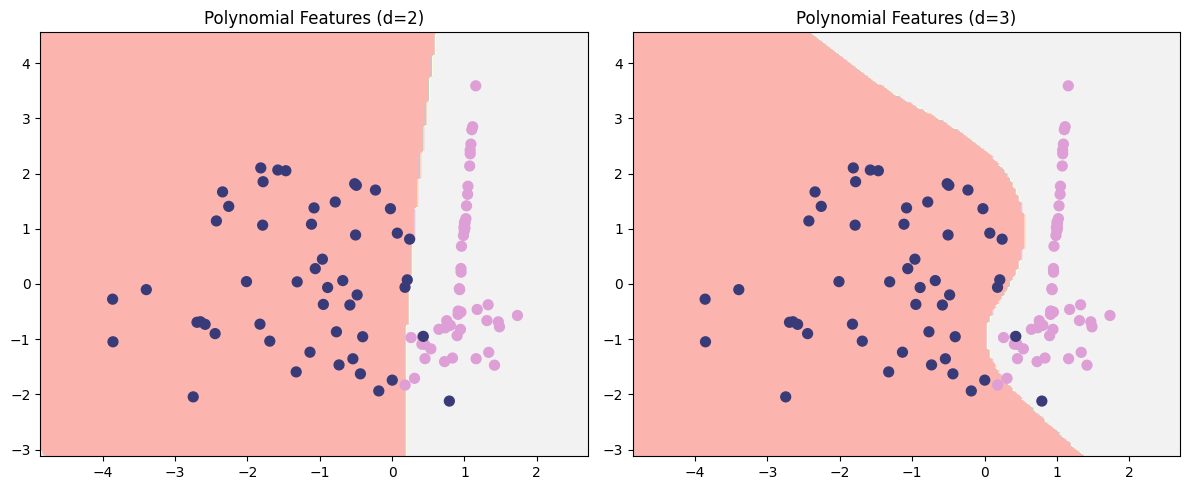

In [47]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=2,
    random_state=67
)

poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=3)

lr2 = LogisticRegression(C=1) # C = 1/λ
lr3 = LogisticRegression(C=1)
lr2.fit(poly2.fit_transform(X), y)
lr3.fit(poly3.fit_transform(X), y)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_2d_clf_problem(X, y, lambda x: lr2.predict(poly2.fit_transform(x)))
plt.title('Polynomial Features (d=2)')

plt.subplot(122)
plot_2d_clf_problem(X, y, lambda x: lr3.predict(poly3.fit_transform(x)))
plt.title('Polynomial Features (d=3)')

plt.tight_layout()
plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?